# Data Science Project: Planning Stage (Individual)

## 1. Introduction

This year we have a unique opportunity: we have a real data science project with real stakeholders who are looking for answers to a few questions about their data.

In particular, a research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a MineCraft serverLinks to an external site., and players' actions are recorded as they navigate through the world. But running this project is not simple: they need to target their recruitment efforts, and make sure they have enough resources (e.g., software licenses, server hardware) to handle the number of players they attract.

### Question

Can player attributes like experience, gender, age, and played hours predict whether a player subscribes to newsletter?

### Data Description

My question relates player specific attributes to help predict if they subscribe to newsletter. For this reason, "players.csv" is required which contains a list of all unique players, including data about each player. There are 196 observations and 7 variables.
1. Experience: Categorical variable
2. Hashed Email: String (chars)
3. Played Hours: Quantitative variable
4. Name: String (chars)
5. Gender: Categorical variable
6. Age: Quantitative variable
7. Subscribe: Categorical Variable (what we wish to predict)

## 2. Methodology

### Import the required packages

In [25]:
library(tidyverse)
library(tidymodels)
library(janitor)

Load the dataset and produce short rows to explore kind of data.

### Load the Data

In [55]:
players <- read_csv("data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


As per the question's interest, we will focus on players dataset. 

Change the subscribe column to a categorical variable.

### Tidy the Data

In [57]:
players <- players |> mutate(subscribe = as_factor(subscribe))
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Count missing values per column - data cleaning

In [58]:
players |> summarize(across(everything(), ~ sum(is.na(.))))

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


We see that the Age column has 2 entries which are not integers. Clean the data by replacing the two NA entries with the mean value derived from the Age column. We don't replace specific to any other feature's selection (like experience level's mean because from initial data scan the experience level doesn't translate to played hours, giving no meaningful correlation to enhance on a singular feature's importance to predict ?subsribe)

In [59]:
players_clean <- players |> 
    clean_names() |>
    mutate(age = replace(age, is.na(age), mean(age, na.rm=TRUE)))

Perform Sanity check to ensure no missing column values

In [60]:
players_clean |> summarize(across(everything(), ~ sum(is.na(.))))

experience,subscribe,hashed_email,played_hours,name,gender,age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0


In [61]:
head(players_clean)

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Summary Statistics

Compute the mean value for each quantitative variable in the players data set

In [62]:
summary(players_clean)

  experience        subscribe   hashed_email        played_hours    
 Length:196         FALSE: 52   Length:196         Min.   :  0.000  
 Class :character   TRUE :144   Class :character   1st Qu.:  0.000  
 Mode  :character               Mode  :character   Median :  0.100  
                                                   Mean   :  5.846  
                                                   3rd Qu.:  0.600  
                                                   Max.   :223.100  
     name              gender               age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.50  
                                       Mean   :21.14  
                                       3rd Qu.:22.25  
                                       Max.   :58.00  

Report the mean values in a table format for each quantitative variable in the players data set

In [63]:
players_clean |>
    select(played_hours, age) |>
    summarize(across(everything(), ~ mean(.)))

played_hours,age
<dbl>,<dbl>
5.845918,21.13918


### Visually inspect single variables and combination of variables for their representation

Distribution for player ages

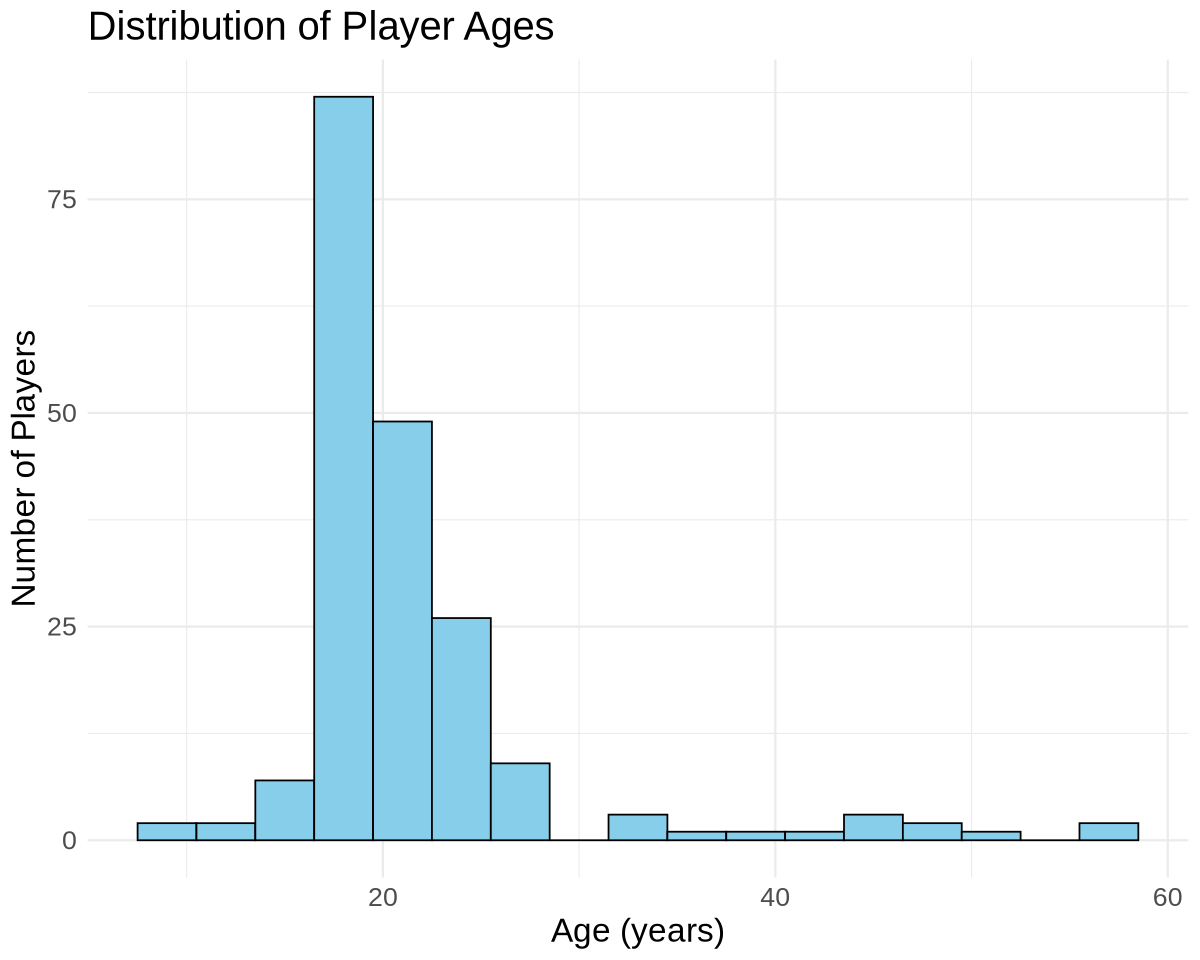

In [64]:
options(repr.plot.width = 10, repr.plot.height = 8)
theme_set(theme_minimal(base_size = 14))
age_plot <- players_clean |> 
    ggplot(aes(x=age)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Age (years)",
        y="Number of Players",
        title="Distribution of Player Ages"
    ) +
    theme(text = element_text(size=20))
age_plot

This shows that most of the players are young, aged 15-22. We don't have enough data for players aged 24+. Age could be a strong predictor to subscribed. Age may interact with other variables to produce a correlation for subscribed value.

Let's see how the subscription in general looks for the different age bins.

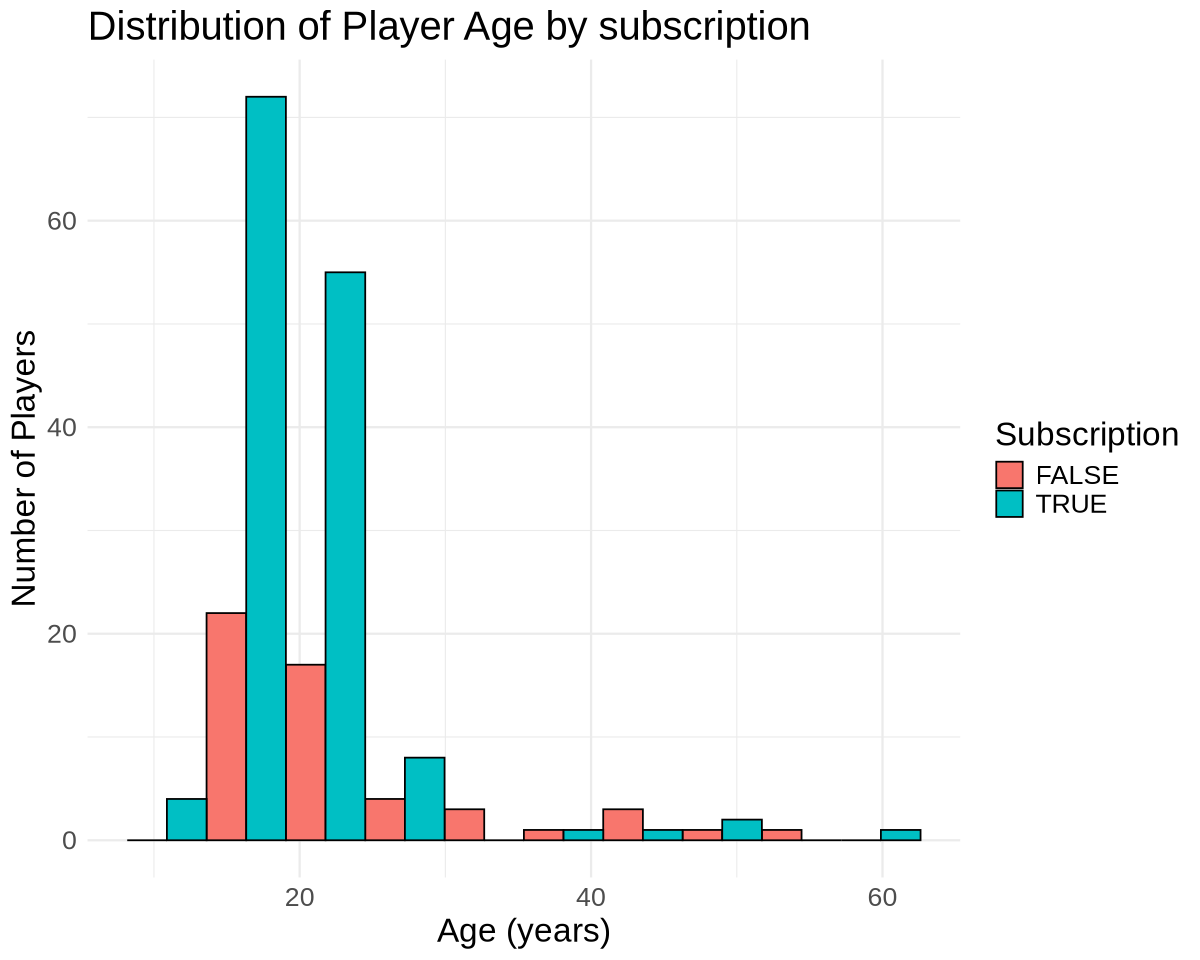

In [74]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_subscription_plot <- players_clean |>
    ggplot(aes(x=age, fill=subscribe)) +
    geom_histogram(position = "dodge", bins = 10, color = "black") +
    labs(
        x="Age (years)",
        y="Number of Players",
        title="Distribution of Player Age by subscription",
        fill="Subscription"
    ) +
    theme(text = element_text(size=20))
age_subscription_plot

Players aged 15-22 are more likely to subscribe. As age increases, the number of subscribers decreases. This informs us that aged players 30+ are unlikely to subscribe. Age appears to be a meaningful variable to help predict subscribed variable.

Distribution of played hours

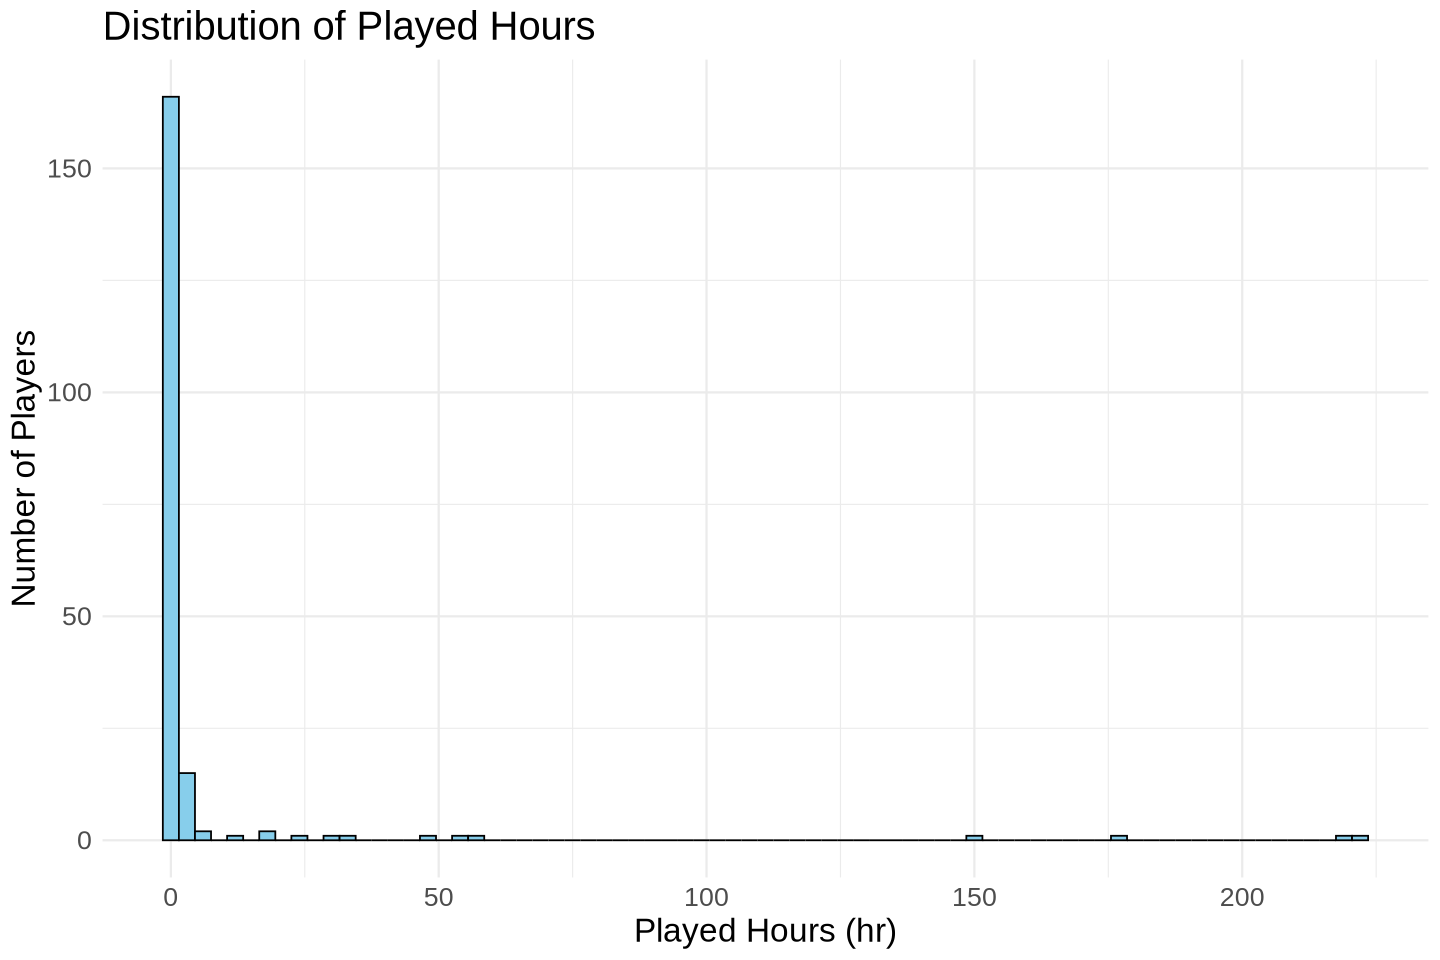

In [66]:
options(repr.plot.width = 12, repr.plot.height = 8)
theme_set(theme_minimal(base_size = 14))
played_hours_plot <- players_clean |> 
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Played Hours (hr)",
        y="Number of Players",
        title="Distribution of Played Hours"
    ) +
    theme(text = element_text(size=20))
played_hours_plot

This shows that the histogram is highly-skewed with most players playing only a few hours with a few outliers. A small group of players contribute to total playing time. Played Hours could be an important variable to help predict subscribed variable.

Let's see how the subscription in general looks for the different played hours bins.

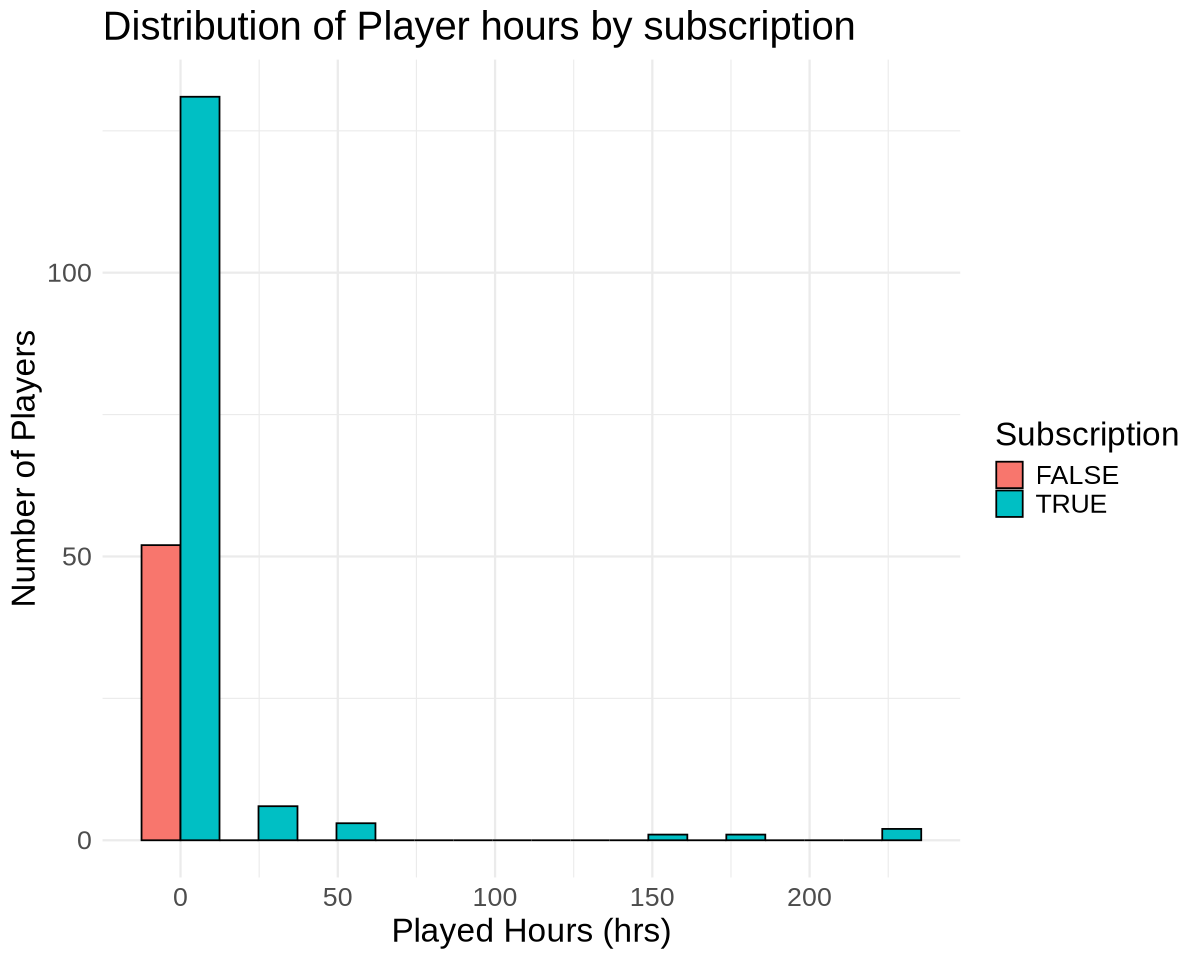

In [76]:
options(repr.plot.width = 10, repr.plot.height = 8)
hours_subscription_plot <- players_clean |>
    ggplot(aes(x=played_hours, fill=subscribe)) +
    geom_histogram(position = "dodge", bins = 10, color = "black") +
    labs(
        x="Played Hours (hrs)",
        y="Number of Players",
        title="Distribution of Player hours by subscription",
        fill="Subscription"
    ) +
    theme(text = element_text(size=20))
hours_subscription_plot

Players with higher played hours are more likely to subscribe. Players with minimal played hours are less likely to subscribe. So, played hours is an important variable to predict subscribed variable.

Distribution of Gender comparing to proportion of subscribers

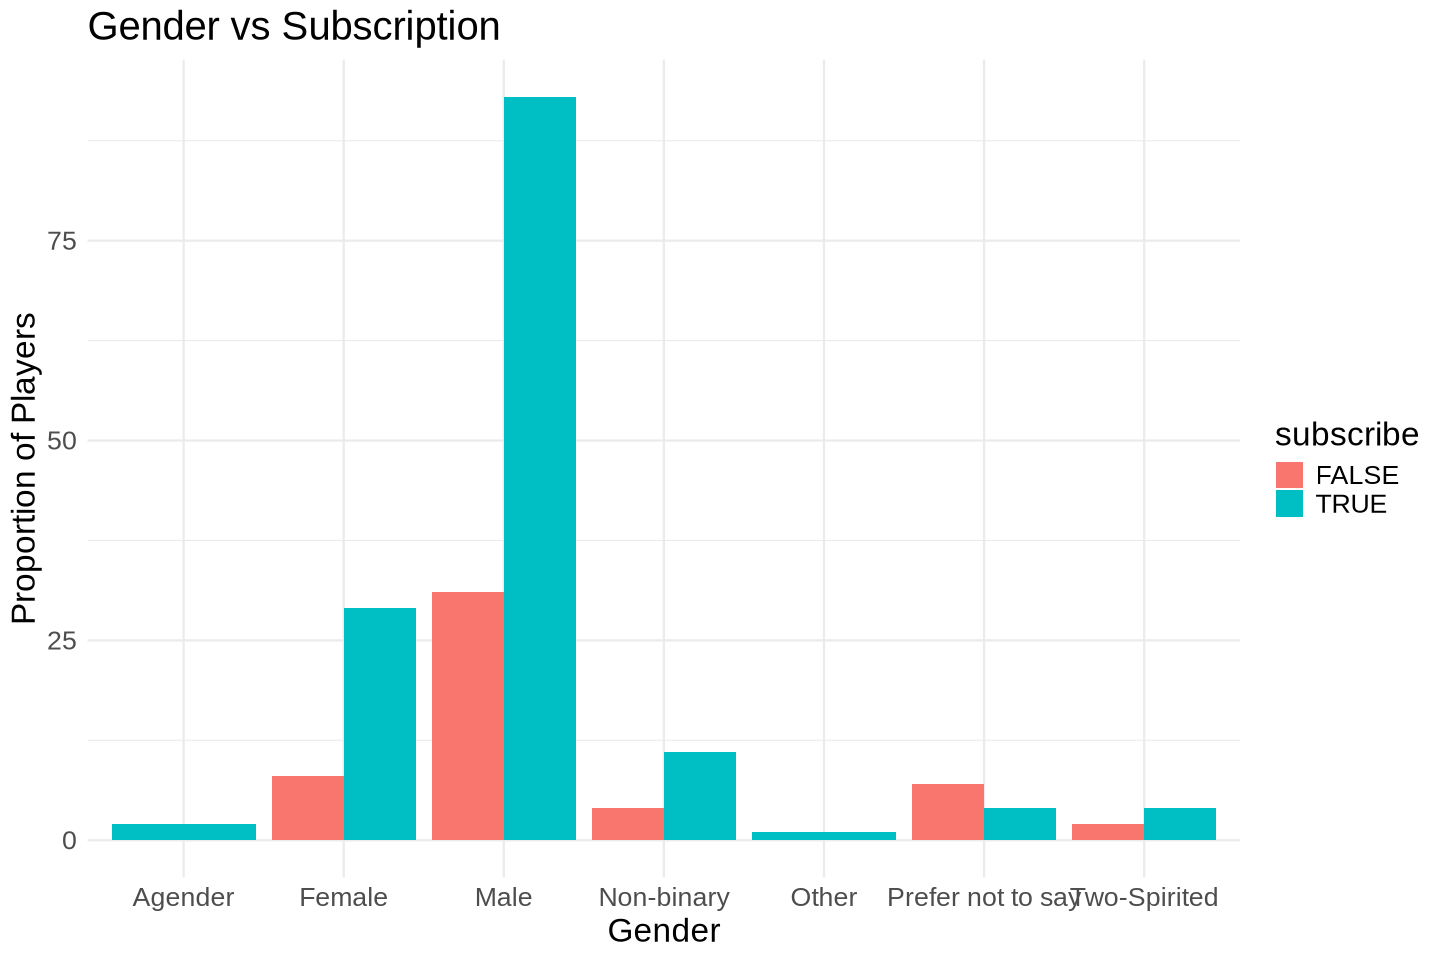

In [85]:
options(repr.plot.width = 12, repr.plot.height = 8)
gender_subscription_plot <- players_clean |>
    ggplot(aes(x=gender, fill=subscribe)) +
    geom_bar(position="dodge") +
    labs(
        x="Gender",
        y="Proportion of Players",
        title="Gender vs Subscription"
    ) +
    theme(text = element_text(size=20))
gender_subscription_plot

Male players form the largest group with higher number of subscribers compared to other genders. Gender may contribute slightly to predicting subscribed variable but not may not be as effective as played hours and age.

Subscription by Experience Level

In [77]:
players_clean |>
    group_by(experience, subscribe) |>
    summarize(count = n())

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count
<chr>,<fct>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
Pro,FALSE,4
Pro,TRUE,10
Regular,FALSE,7
Regular,TRUE,29
Veteran,FALSE,15


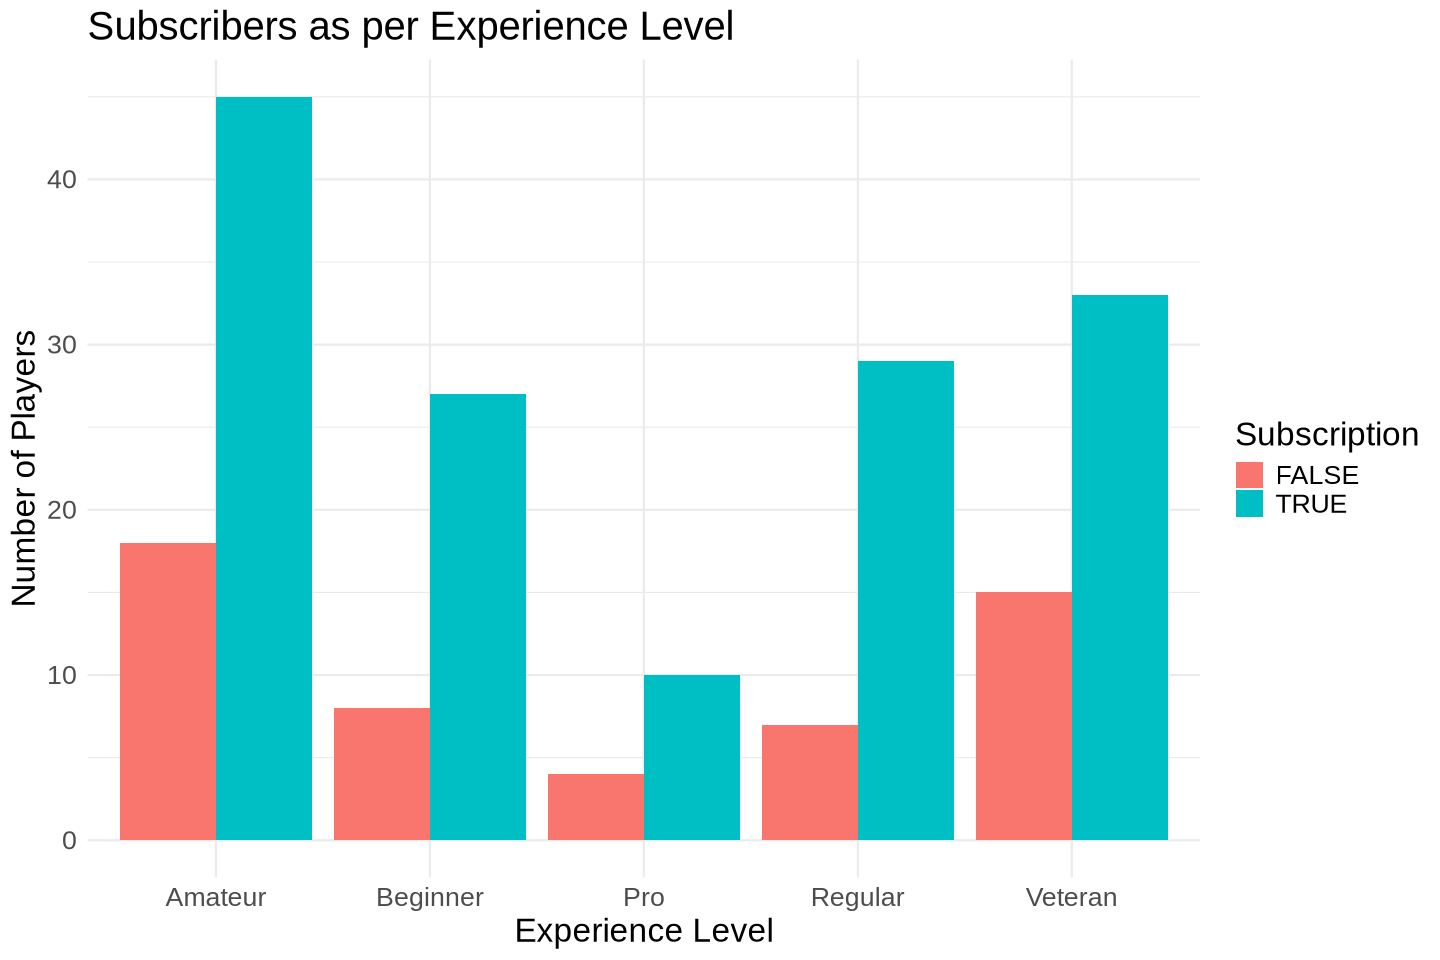

In [80]:
options(repr.plot.width = 12, repr.plot.height = 8)
subscription_plot <- players_clean |> 
    ggplot(aes(x=experience, fill=subscribe)) +
    geom_bar(position="dodge") +
    labs(
        x="Experience Level",
        y="Number of Players",
        title="Subscribers as per Experience Level",
        fill="Subscription"
    ) +
    theme(text = element_text(size=20))
subscription_plot

The bar chart shows that the subscribers dominate across all experience categories. So, experience is important to help predict subscribed variable. However, experience alone is not quite useful as each category has both subscribed and not subscribed values.

Relation between age and played hours

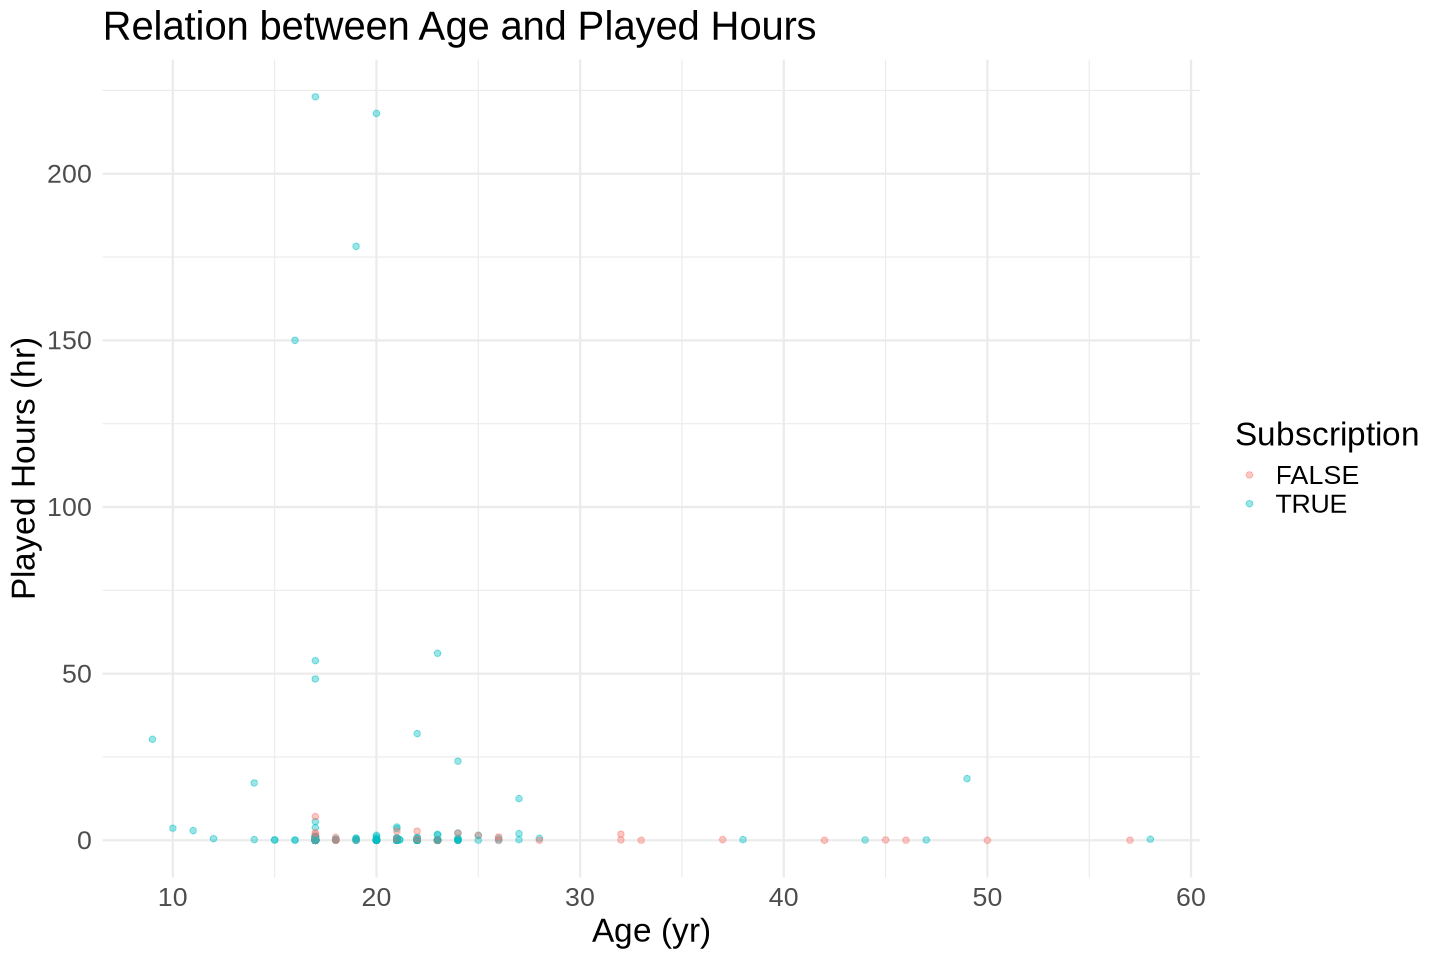

In [82]:
options(repr.plot.width = 12, repr.plot.height = 8)
age_played_time_plot <- players_clean |>
    ggplot(aes(x=age, y=played_hours, color=subscribe)) +
    geom_point(alpha=0.4) +
    labs(
        x="Age (yr)",
        y="Played Hours (hr)",
        title="Relation between Age and Played Hours",
        color="Subscription"
    ) +
    theme(text = element_text(size=20))
age_played_time_plot

The scatterplot shows no clear linear relationship between player age and played hours. Players aged 25 or less tend to play for more hours and are more likely to subscribe. Age and played hours together helps with the subscribed prediction.

The bar chart shows that male players are the largest group and also make most of the subscribers

Average played hours by experience

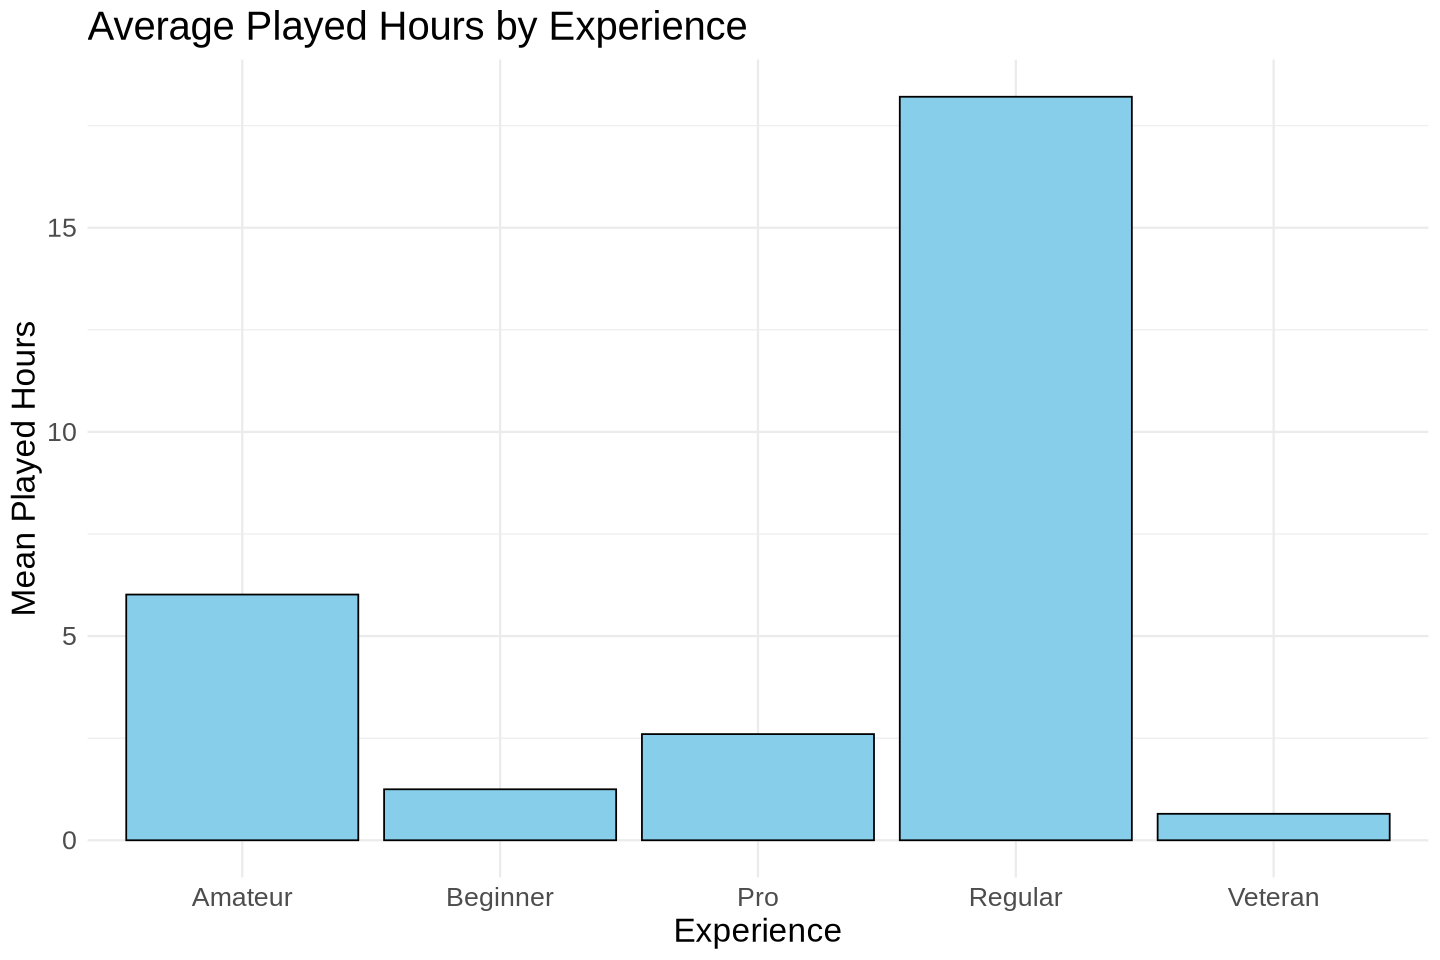

In [72]:
played_hours_experience_plot <- players_clean |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours)) |>
    ggplot(aes(x=experience, y=mean_played_hours)) +
    geom_bar(stat="identity", fill="skyblue", color="black") +
    labs(
        x="Experience",
        y="Mean Played Hours",
        title="Average Played Hours by Experience"
    ) +
    theme(text = element_text(size=20))
played_hours_experience_plot

Players with regular experience have the higest average played hours. Amateurs play moderately. This doesn't conclusively convey if players with higher played hours neccessarily fall in the more experienced categories, like veteran. So, we can't order the experience categories based on playing time.

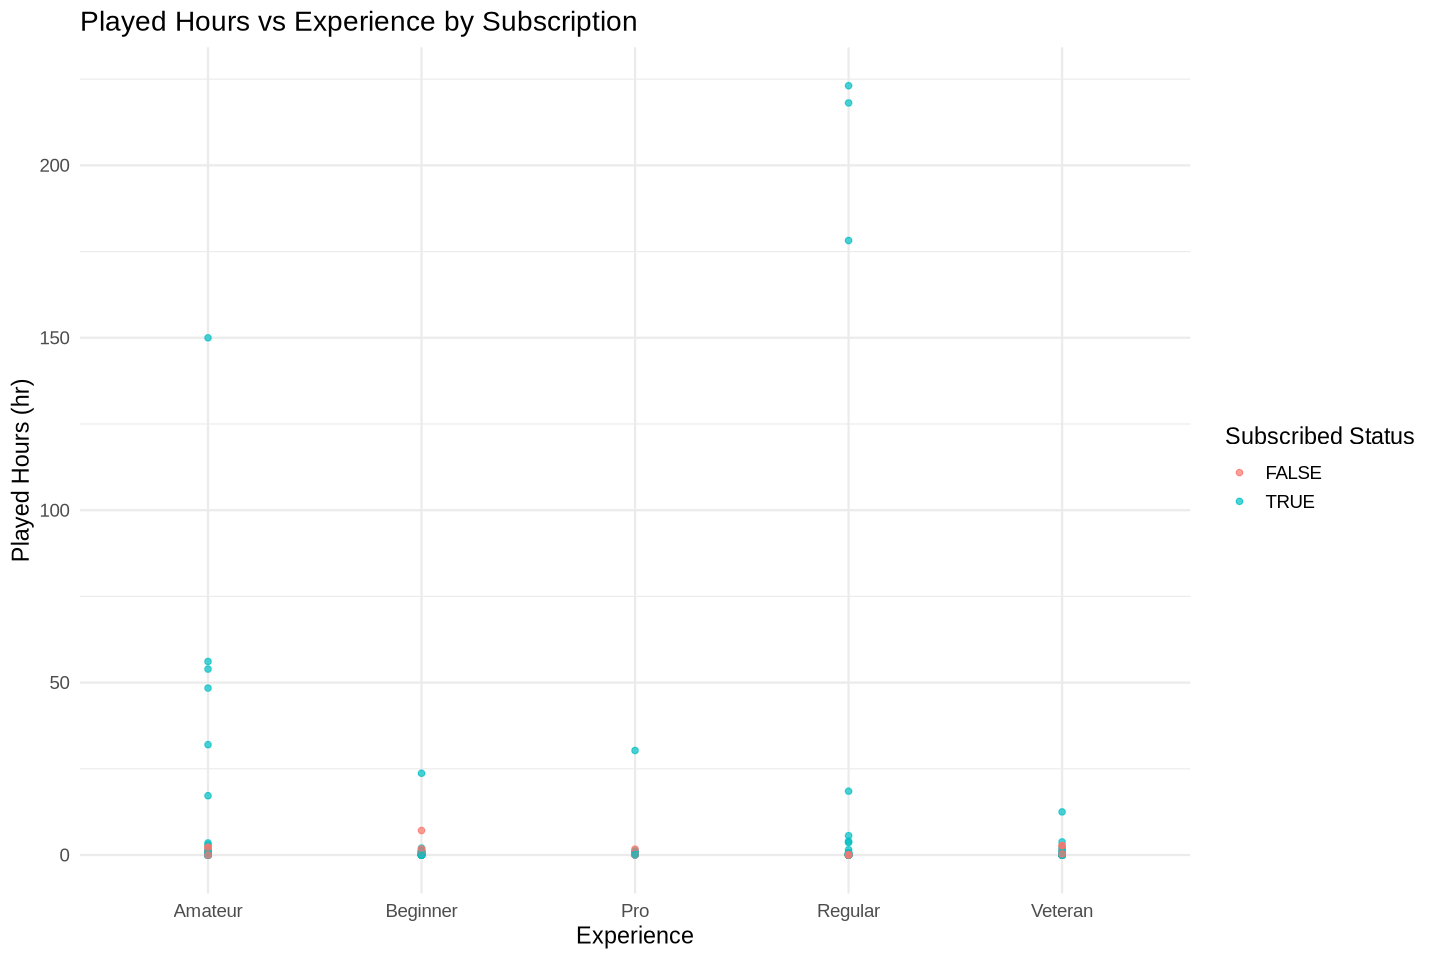

In [43]:
experience_played_hrs_subscribed_plot <- players_clean |>
    ggplot(aes(x=experience, y=played_hours, color=subscribe)) +
    geom_point(alpha=0.7) +
    labs(
        x="Experience",
        y="Played Hours (hr)",
        title="Played Hours vs Experience by Subscription",
        color="Subscribed Status"
    )
experience_played_hrs_subscribed_plot

This further riterates that subscribed players generally have higher played hours across most experience levels. Unsubscribed players are closer together near lower spectrum of played hours. So, played hours, together with experience appears to be a meaningful predictor to subscribed variable. 

## 3. Methods and Plan

I will use **k-nn classification** to predict whether a player subscribes to newsletters.

The response variable is categorical (true/false) so a classification method is required. K-nn can capture non-linear relationship between predictors and can uses distance-based similarity. That means players with similar attributes are placed near to each other, helping with our prediction.

We **assume** the following:
1. All features are numeric or encoded in a format that can be passed onto k-nn. This includes Gender and Experience.
2. All the features should be on similar scales. So, we should scale them appropriately.

We may have the following **Potential Limitations**:
1. K-nn is computationally expensive.
2. The choice of k (hyper-parameter for k-nn) affects our results.
3. K-nn doesn't show how each feature variable is helping to predict the subscription variable. Regression gives weights that helps with the interpretability.
4. Dataset doesn't have enough data records to help with differing variable assignment to values.
5. K-nn looses the ordering of categorical variable when converted to quantitaive feature values. 

Model **Comparison** and Selection:
1. Use cross-validation (5-folds) to compare different values of k and choose the best k with lowest error rate.
2. Compare model's performance to a base line model, like always predicting the mode of the classifications (like true).

**Data Processing** plan:
1. Split the data to Train set and Test set with 80/20 rule.
2. Convert all categorical features to quantitative feature values using one-hot encoding. Scale all predictors and center accordingly.
3. Train the k-nn with differing k values (tune) and use 5-fold cross validation to evaluate accuracy and choose the best k.
4. Re-train the final model on entirety of train data. Test on test data and report accuracy.